### Under-fitting:  
- a model is too simple to capture the underlying patterns in the data, leading to high errors on both __training__ and __test__ sets

### Over-fitting:
- when a model learns the training data too well, including its noise, to the point where it performs poorly on new, unseen test data

### Good-fitting: 
- a model fits well

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error
from sklearn.linear_model import Ridge, RidgeCV

In [ ]:
np.random.seed(42)
x = np.random.uniform(-3, 3, size = 100)
y = 0.5 * x ** 2 + x + 2 + np.random.normal(0, 1, 100)
# Generate 100 y values + np.random.normal(mean = 0, std = 1, size = 100) to add noise 
# Simulate the real_world data
x = x.reshape(-1, 1)

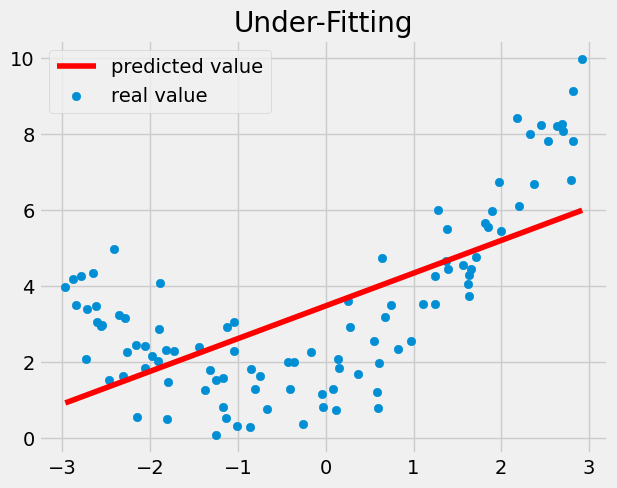

MSE = 2.534246480823169


In [80]:
estimator = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
estimator.fit(x_train, y_train)
weight = estimator.coef_
intercept = estimator.intercept_

y_pre = estimator.predict(x_test)
x_line = np.linspace(min(x), max(x), 100)
y_line = weight * x_line + intercept
plt.style.use('fivethirtyeight')
plt.plot(x_line, y_line, 'r', label = 'predicted value')
plt.scatter(x, y, label = 'real value')
plt.legend()
plt.tight_layout()
plt.title('Under-Fitting')
plt.show()
print(f'MSE = {mean_squared_error(y_test, y_pre)}')

MSE = 0.6358406072820803


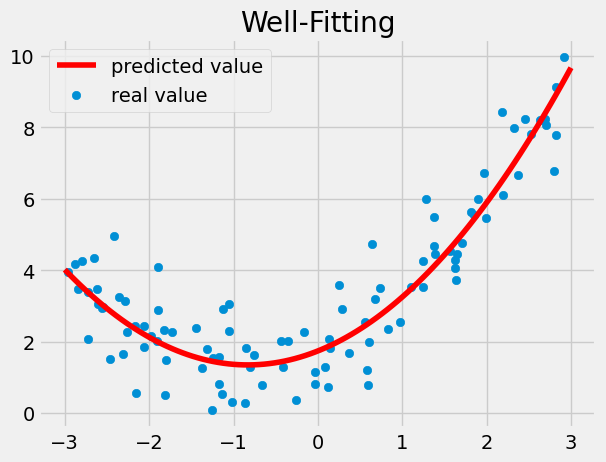

In [81]:
np.random.seed(42)
x2 = np.random.uniform(-3, 3, size = 100)
y2 = 0.5 * x2 ** 2 + x2 + 2 + np.random.normal(0, 1, 100)
# Generate 100 y values + np.random.normal(mean = 0, std = 1, size = 100) to add noise 
# Simulate the real_world data
x2 = x2.reshape(-1, 1)
x2 = np.hstack([x2, x2**2])

x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size = 0.2, random_state = 42)

estimator.fit(x_train2, y_train2)
x_plot = np.linspace(-3, 3, 100).reshape(-1, 1)
x_plot2 = np.hstack([x_plot, x_plot**2])

y_plot = estimator.predict(x_plot2)
y_predict = estimator.predict(x_test2)
plt.plot(x_plot, y_plot, color='red', label='predicted value')
plt.scatter(x2[:,0], y2, label='real value')
plt.title('Well-Fitting')
plt.legend()
plt.plot()
print(f'MSE = {mean_squared_error(y_test2, y_predict)}')

### Over-Fitting

MSE = 0.691


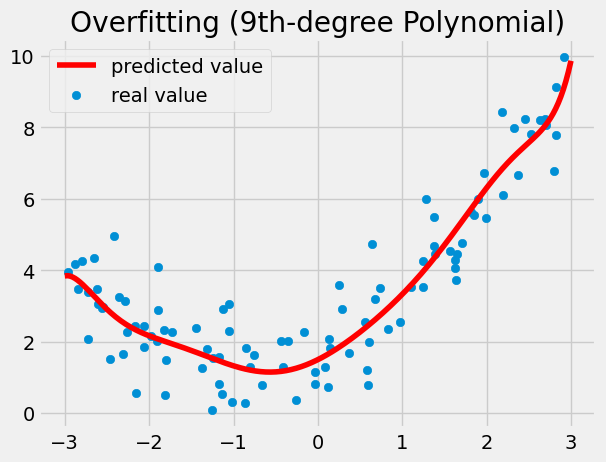

In [ ]:
np.random.seed(42)
x = np.random.uniform(-3, 3, size=100)
y3 = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, 100)

x3 = np.vstack([x**i for i in range(1, 10)]).T

x_train3, x_test3, y_train3, y_test3 = train_test_split(x3, y3, test_size=0.2, random_state=42)

estimator = LinearRegression()
estimator.fit(x_train3, y_train3)

y_pre3 = estimator.predict(x_test3)

print(f"MSE = {mean_squared_error(y_test3, y_pre3):.3f}")

plt.style.use('fivethirtyeight')
x_plot = np.linspace(-3, 3, 200)
x_plot_poly = np.vstack([x_plot**i for i in range(1, 10)]).T
y_plot = estimator.predict(x_plot_poly)

plt.plot(x_plot, y_plot, color='red', label='predicted value')
plt.scatter(x, y3, label='real value')
plt.title('Overfitting (9th-degree Polynomial)')
plt.legend()
plt.show()

### Overfitting - solutions

1. clean data again 
2. expand the dataset
3. regularization
4. Reduce the number of feature dimensions, prevent the curse of dimensionality

Regularization : 

The weights of the feature columns are adjusted based on a penalty coefficient — the stronger the penalty, the greater the adjustment. 

#### L1 Regularization
- Lasso Regression
- Drives some weights to zero, achieving feature selection 

MSE = 0.612


/Users/xiyueyuan/Desktop/Coding/.venv/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.371e+01, tolerance: 4.337e-02
  model = cd_fast.enet_coordinate_descent(


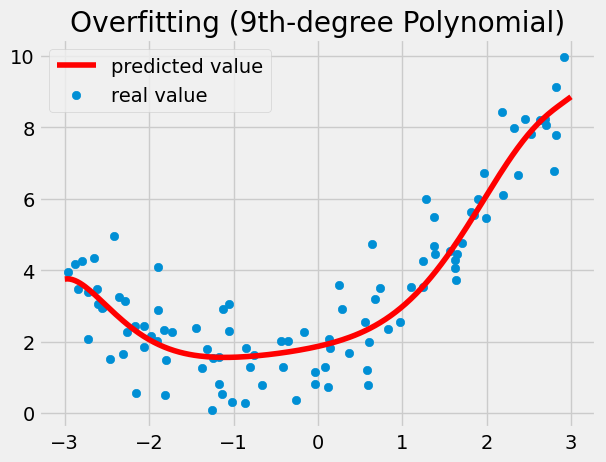

In [89]:
from sklearn.linear_model import Lasso
np.random.seed(42)
x = np.random.uniform(-3, 3, size=100)
y3 = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, 100)

x3 = np.vstack([x**i for i in range(1, 10)]).T

x_train3, x_test3, y_train3, y_test3 = train_test_split(x3, y3, test_size=0.2, random_state=42)

estimator = Lasso(alpha = 0.1)
estimator.fit(x_train3, y_train3)

y_pre3 = estimator.predict(x_test3)

print(f"MSE = {mean_squared_error(y_test3, y_pre3):.3f}")

plt.style.use('fivethirtyeight')
x_plot = np.linspace(-3, 3, 200)
x_plot_poly = np.vstack([x_plot**i for i in range(1, 10)]).T
y_plot = estimator.predict(x_plot_poly)

plt.plot(x_plot, y_plot, color='red', label='predicted value')
plt.scatter(x, y3, label='real value')
plt.title('Overfitting (9th-degree Polynomial)')
plt.legend()
plt.show()


#### L2 Regularization
- Ridge Regression 
- drives the weights toward zero but does not make them exactly zero

MSE = 0.693


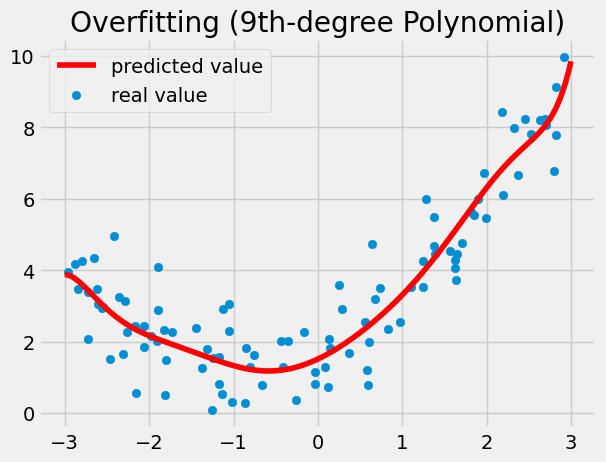

In [90]:
from sklearn.linear_model import Ridge
np.random.seed(42)

x = np.random.uniform(-3, 3, size=100)
y3 = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, 100)

x3 = np.vstack([x**i for i in range(1, 10)]).T

x_train3, x_test3, y_train3, y_test3 = train_test_split(x3, y3, test_size=0.2, random_state=42)

estimator = Ridge(alpha = 0.1)
estimator.fit(x_train3, y_train3)

y_pre3 = estimator.predict(x_test3)

print(f"MSE = {mean_squared_error(y_test3, y_pre3):.3f}")

plt.style.use('fivethirtyeight')
x_plot = np.linspace(-3, 3, 200)
x_plot_poly = np.vstack([x_plot**i for i in range(1, 10)]).T
y_plot = estimator.predict(x_plot_poly)

plt.plot(x_plot, y_plot, color='red', label='predicted value')
plt.scatter(x, y3, label='real value')
plt.title('Overfitting (9th-degree Polynomial)')
plt.legend()
plt.show()
